In [1]:
# Import libs
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf

In [2]:
# Load stored data
%store -r X_train
%store -r X_cv
%store -r y_train
%store -r y_cv
%store -r mmscaler
%store -r pca
%store -r X_train_pca

### Prepare data

In [3]:
print("The number of total samples: ", X_train.shape[0] + X_cv.shape[0])
print("The shape of train set: ", X_train_pca.shape)  # use scaled (normalized) and pca processed train data set
print("The shape of test set: ", X_cv.shape) # use cv set as test set (train set will be divided into cv while training)

The number of total samples:  22564
The shape of train set:  (18051, 1317)
The shape of test set:  (4513, 12288)


## Things to do
1. Using Keras library (for the computer vision dataset) 
    - Measure the accracy on the training set. 
    - Then measure the accuacy using 10-fold cross-validation. Use the major metrics: Accruracy, TP rate, FP rate, Precision, Recall, F measure, the ROC area 
2. Experiment with various parameters that control the learning. (the learning rate, the number and size of layers, the number of iterations, batch size, epochs and momentum, and validation threshold)
3. Experiement with three different train-test set split. 

### 1. Use Keras library to build an Image Classifier

In [4]:
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.10.0
2.10.0


In [5]:
# build model 
model = keras.models.Sequential([
    keras.layers.Input(shape=X_train_pca.shape[1], name="input"),
        keras.layers.Dense(100, name="layer1", activation="relu"),
    keras.layers.Dense(10, name="layer2", activation="sigmoid"),
    keras.layers.Dense(1, name="layer3", activation="sigmoid") # use sigmoid because our data sets is binary classification
                                                               # units = 1 because we are using sigmoid in binary classification
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 100)               131800    
                                                                 
 layer2 (Dense)              (None, 10)                1010      
                                                                 
 layer3 (Dense)              (None, 1)                 11        
                                                                 
Total params: 132,821
Trainable params: 132,821
Non-trainable params: 0
_________________________________________________________________


In [6]:
# check the number of parameters of each layers, and the shape of input&output
print("The shape of the input data:", model.input.shape)
print("The number of parameters of layer1: ", (model.input.shape[1]+1) * model.layers[0].units)
print("The number of parameters of layer2: ", (model.layers[0].units+1) * model.layers[1].units)
print("The number of parameters of layer3: ", (model.layers[1].units+1) * model.layers[2].units)

The shape of the input data: (None, 1317)
The number of parameters of layer1:  131800
The number of parameters of layer2:  1010
The number of parameters of layer3:  11


In [7]:
# check the shape of weights of each layer
print("The shape of weights of layer1: ", [len(model.layers[0].get_weights()[0]), len(model.layers[0].get_weights()[0][0])])
print("The shape of weights of layer2: ", [len(model.layers[1].get_weights()[0]), len(model.layers[1].get_weights()[0][0])])
print("The shape of weights of layer3: ", [len(model.layers[2].get_weights()[0]), len(model.layers[2].get_weights()[0][0])])

The shape of weights of layer1:  [1317, 100]
The shape of weights of layer2:  [100, 10]
The shape of weights of layer3:  [10, 1]


In [8]:
# check the length of biases of each layer
print("The shape of biases of layer1: ", len(model.layers[0].get_weights()[1]))
print("The shape of biases of layer2: ", len(model.layers[1].get_weights()[1]))
print("The shape of biases of layer3: ", len(model.layers[2].get_weights()[1]))

The shape of biases of layer1:  100
The shape of biases of layer2:  10
The shape of biases of layer3:  1


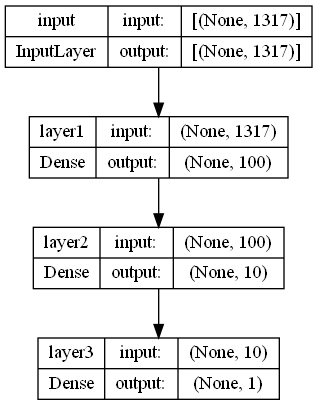

In [9]:
# plot the model
keras.utils.plot_model(model, show_shapes=True)

In [10]:
# specify the loss function and the optimizer
# reference for choosing loss function: 
# https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])

In [11]:
y_train = np.array(y_train)
y_cv = np.array(y_cv)

#### Measure accuracy on train set and test(cv) set

In [12]:
# fit
history = model.fit(X_train_pca, y_train, epochs=30, validation_split=0.1)

Epoch 1/30
508/508 [==============================] - 3s 5ms/step - loss: 0.5562 - accuracy: 0.7282 - val_loss: 0.5154 - val_accuracy: 0.7536
Epoch 2/30
508/508 [==============================] - 2s 4ms/step - loss: 0.4807 - accuracy: 0.7831 - val_loss: 0.4782 - val_accuracy: 0.7835
Epoch 3/30
508/508 [==============================] - 2s 3ms/step - loss: 0.4539 - accuracy: 0.7968 - val_loss: 0.4639 - val_accuracy: 0.7885
Epoch 4/30
508/508 [==============================] - 1s 3ms/step - loss: 0.4394 - accuracy: 0.8037 - val_loss: 0.4558 - val_accuracy: 0.7924
Epoch 5/30
508/508 [==============================] - 2s 3ms/step - loss: 0.4293 - accuracy: 0.8090 - val_loss: 0.4513 - val_accuracy: 0.7962
Epoch 6/30
508/508 [==============================] - 2s 3ms/step - loss: 0.4216 - accuracy: 0.8147 - val_loss: 0.4516 - val_accuracy: 0.7962
Epoch 7/30
508/508 [==============================] - 2s 3ms/step - loss: 0.4155 - accuracy: 0.8177 - val_loss: 0.4502 - val_accuracy: 0.7979
Epoch 

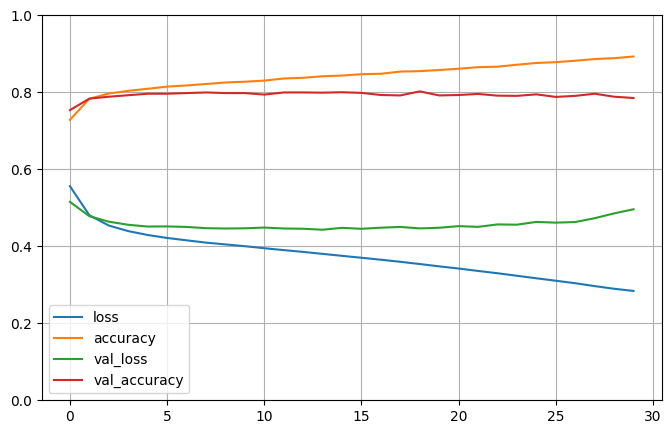

In [13]:
# plot the history
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [14]:
## measure accuracy on test set
# set validation data
X_cv_scaled = mmscaler.transform(X_cv)
X_cv_pca = pca.transform(X_cv_scaled)
print("The shape of the validation data: ", X_cv_pca.shape)
print("Number of features of the train set and validation set is same?: ", X_train_pca.shape[1] == X_cv_pca.shape[1])

The shape of the validation data:  (4513, 1317)
Number of features of the train set and validation set is same?:  True


In [15]:
model.evaluate(X_cv_pca, y_cv) 

142/142 [==============================] - 0s 2ms/step - loss: 0.4515 - accuracy: 0.8105


[0.45149680972099304, 0.8105472922325134]

#### Measure accuracy using 10-fold cross validation

In [16]:
# define a function for creating new model
def create_model():
    # build model
    model = keras.models.Sequential([
    keras.layers.Input(shape=X_train_pca.shape[1], name="input"),
        keras.layers.Dense(100, name="layer1", activation="relu"),
    keras.layers.Dense(10, name="layer2", activation="sigmoid"),
    keras.layers.Dense(1, name="layer3", activation="sigmoid") 
    ])
    # compile
    model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])
    return model

In [17]:
# implement 10-fold cross-validation manually and evaluate it using major matics 
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score

# make data from for evaluation 
columns = ['Accuracy', 'TP', 'FP', 'TN', 'FN', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'Area Under RoC Curve']
tenFold_evaluation = pd.DataFrame(columns = columns)
tenFold_evaluation

# split data into 10 groups
from sklearn.model_selection import StratifiedKFold
strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train, y_train)


for k, (train, test) in enumerate(kfold):
    # create model
    model = create_model()
    
    # fit and predict
    history = model.fit(X_train_pca[train], y_train[train], epochs=30)
    pred = model.predict(X_train_pca[test]).reshape(-1) >= 0.5
    
    # evaluate
    accuracy = sum(pred==y_train[test]) / len(pred)
    cm = confusion_matrix(y_train[test], pred)
    tp, fp, tn, fn = cm[1,1], cm[0,1], cm[0,0], cm[1,0]
    sensitivity = tp / (tp+fn)
    specificity = tn / (tn+fp)
    precision = precision_score(y_train[test], pred)
    recall = recall_score(y_train[test], pred)
    auc = roc_auc_score(pred, y_train[test])
    
    index = str(k+1) + "fold"
    tenFold_evaluation.loc[index] = [accuracy, tp, fp, tn, fn, sensitivity, specificity, precision, recall, auc]

tenFold_evaluation

Epoch 1/30
508/508 [==============================] - 2s 2ms/step - loss: 0.5354 - accuracy: 0.7417
Epoch 2/30
508/508 [==============================] - 1s 2ms/step - loss: 0.4719 - accuracy: 0.7853
Epoch 3/30
508/508 [==============================] - 1s 2ms/step - loss: 0.4512 - accuracy: 0.7982
Epoch 4/30
508/508 [==============================] - 1s 2ms/step - loss: 0.4389 - accuracy: 0.8046
Epoch 5/30
508/508 [==============================] - 1s 2ms/step - loss: 0.4306 - accuracy: 0.8112
Epoch 6/30
508/508 [==============================] - 1s 2ms/step - loss: 0.4239 - accuracy: 0.8151
Epoch 7/30
508/508 [==============================] - 1s 2ms/step - loss: 0.4175 - accuracy: 0.8182
Epoch 8/30
508/508 [==============================] - 1s 2ms/step - loss: 0.4123 - accuracy: 0.8218
Epoch 9/30
508/508 [==============================] - 1s 2ms/step - loss: 0.4069 - accuracy: 0.8251
Epoch 10/30
508/508 [==============================] - 1s 2ms/step - loss: 0.4021 - accuracy: 0.8281

508/508 [==============================] - 1s 2ms/step - loss: 0.4012 - accuracy: 0.8267
Epoch 11/30
508/508 [==============================] - 1s 2ms/step - loss: 0.3965 - accuracy: 0.8295
Epoch 12/30
508/508 [==============================] - 1s 2ms/step - loss: 0.3918 - accuracy: 0.8326
Epoch 13/30
508/508 [==============================] - 1s 2ms/step - loss: 0.3873 - accuracy: 0.8345
Epoch 14/30
508/508 [==============================] - 1s 2ms/step - loss: 0.3820 - accuracy: 0.8389
Epoch 15/30
508/508 [==============================] - 1s 2ms/step - loss: 0.3769 - accuracy: 0.8406
Epoch 16/30
508/508 [==============================] - 1s 2ms/step - loss: 0.3713 - accuracy: 0.8442
Epoch 17/30
508/508 [==============================] - 1s 3ms/step - loss: 0.3663 - accuracy: 0.8485
Epoch 18/30
508/508 [==============================] - 1s 2ms/step - loss: 0.3611 - accuracy: 0.8504
Epoch 19/30
508/508 [==============================] - 1s 2ms/step - loss: 0.3547 - accuracy: 0.8546
Ep

,Accuracy,TP,FP,TN,FN,Sensitivity,Specificity,Precision,Recall,Area Under RoC Curve
1fold,0.799003,604.0,163.0,839.0,200.0,0.751244,0.837325,0.787484,0.751244,0.797495
2fold,0.814958,592.0,122.0,879.0,212.0,0.736318,0.878122,0.829132,0.736318,0.817407
3fold,0.802216,587.0,140.0,861.0,217.0,0.730100,0.860140,0.807428,0.730100,0.803065
4fold,0.788366,620.0,198.0,803.0,184.0,0.771144,0.802198,0.757946,0.771144,0.785761
5fold,0.814958,641.0,171.0,830.0,163.0,0.797264,0.829171,0.789409,0.797264,0.812630
6fold,0.792244,592.0,163.0,838.0,212.0,0.736318,0.837163,0.784106,0.736318,0.791101
7fold,0.783380,598.0,185.0,816.0,206.0,0.743781,0.815185,0.763729,0.743781,0.781082
8fold,0.801108,589.0,144.0,857.0,215.0,0.732587,0.856144,0.803547,0.732587,0.801494
9fold,0.811080,624.0,161.0,840.0,180.0,0.776119,0.839161,0.794904,0.776119,0.809217
10fold,0.793352,607.0,177.0,825.0,196.0,0.755915,0.823353,0.774235,0.755915,0.791133


In [18]:
tenFold_evaluation

,Accuracy,TP,FP,TN,FN,Sensitivity,Specificity,Precision,Recall,Area Under RoC Curve
1fold,0.799003,604.0,163.0,839.0,200.0,0.751244,0.837325,0.787484,0.751244,0.797495
2fold,0.814958,592.0,122.0,879.0,212.0,0.736318,0.878122,0.829132,0.736318,0.817407
3fold,0.802216,587.0,140.0,861.0,217.0,0.730100,0.860140,0.807428,0.730100,0.803065
4fold,0.788366,620.0,198.0,803.0,184.0,0.771144,0.802198,0.757946,0.771144,0.785761
5fold,0.814958,641.0,171.0,830.0,163.0,0.797264,0.829171,0.789409,0.797264,0.812630
6fold,0.792244,592.0,163.0,838.0,212.0,0.736318,0.837163,0.784106,0.736318,0.791101
7fold,0.783380,598.0,185.0,816.0,206.0,0.743781,0.815185,0.763729,0.743781,0.781082
8fold,0.801108,589.0,144.0,857.0,215.0,0.732587,0.856144,0.803547,0.732587,0.801494
9fold,0.811080,624.0,161.0,840.0,180.0,0.776119,0.839161,0.794904,0.776119,0.809217
10fold,0.793352,607.0,177.0,825.0,196.0,0.755915,0.823353,0.774235,0.755915,0.791133


### 2. Experiment with various parameters that control the learning
For example, the learning rate, the number and size of layers, the number of iterations, batch size, epochs and momentum, and validation threshold.

In [19]:
# for faster testing, split train data set into train - cv set again (rather than using 10-fold cross validation)
from sklearn.model_selection import train_test_split
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X_train_pca, y_train, test_size=0.1, random_state=42)
print(X_train_temp.shape)
print(X_test_temp.shape)

(16245, 1317)
(1806, 1317)


In [20]:
# make data from for evaluation 
columns = ['Accuracy', 'TP', 'FP', 'TN', 'FN', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'Area Under RoC Curve']
architecture_evaluation = pd.DataFrame(columns = columns)
architecture_evaluation

,Accuracy,TP,FP,TN,FN,Sensitivity,Specificity,Precision,Recall,Area Under RoC Curve


In [21]:
# given a fitted model, predict on new data and record the result of evaluation 
def evaluate_model(model, description):    
    # predict
    pred = model.predict(X_test_temp).reshape(-1) >= 0.5    
    # evaluate
    accuracy = sum(pred==y_test_temp) / len(pred)
    cm = confusion_matrix(y_test_temp, pred)
    tp, fp, tn, fn = cm[1,1], cm[0,1], cm[0,0], cm[1,0]
    sensitivity = tp / (tp+fn)
    specificity = tn / (tn+fp)
    precision = precision_score(y_test_temp, pred)
    recall = recall_score(y_test_temp, pred)
    auc = roc_auc_score(pred, y_test_temp)
    
    index = description
    architecture_evaluation.loc[index] = [accuracy, tp, fp, tn, fn, sensitivity, specificity, precision, recall, auc]

#### Experiment with the number and size of layers 

In [22]:
# build model with different size of layer (layer1 - 100, layer2 - 10, layer3 - 1)
model1 = keras.models.Sequential([
    keras.layers.Input(shape=X_train_pca.shape[1], name="input"),
    keras.layers.Dense(100, name="layer1", activation="relu"),
    keras.layers.Dense(10, name="layer2", activation="sigmoid"),
    keras.layers.Dense(1, name="layer3", activation="sigmoid") 
])
# complie
model1.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])
# fit
history1 = model1.fit(X_train_temp, y_train_temp, epochs=30, validation_split=0.1)

# evaluate
description = "Layer1 100, Layer2 10, Layer3 1"
evaluate_model(model1, description)
architecture_evaluation

Epoch 1/30
457/457 [==============================] - 2s 3ms/step - loss: 0.6049 - accuracy: 0.6806 - val_loss: 0.5616 - val_accuracy: 0.7280
Epoch 2/30
457/457 [==============================] - 1s 3ms/step - loss: 0.5219 - accuracy: 0.7538 - val_loss: 0.5040 - val_accuracy: 0.7649
Epoch 3/30
457/457 [==============================] - 1s 3ms/step - loss: 0.4806 - accuracy: 0.7795 - val_loss: 0.4742 - val_accuracy: 0.7717
Epoch 4/30
457/457 [==============================] - 1s 3ms/step - loss: 0.4589 - accuracy: 0.7918 - val_loss: 0.4581 - val_accuracy: 0.7797
Epoch 5/30
457/457 [==============================] - 1s 3ms/step - loss: 0.4450 - accuracy: 0.8017 - val_loss: 0.4490 - val_accuracy: 0.7902
Epoch 6/30
457/457 [==============================] - 1s 3ms/step - loss: 0.4354 - accuracy: 0.8068 - val_loss: 0.4405 - val_accuracy: 0.7957
Epoch 7/30
457/457 [==============================] - 1s 3ms/step - loss: 0.4276 - accuracy: 0.8109 - val_loss: 0.4394 - val_accuracy: 0.7871
Epoch 

,Accuracy,TP,FP,TN,FN,Sensitivity,Specificity,Precision,Recall,Area Under RoC Curve
"Layer1 100, Layer2 10, Layer3 1",0.807863,578.0,111.0,881.0,236.0,0.710074,0.888105,0.838897,0.710074,0.813808


In [23]:
# build model with different size of layer (layer1 - 200, layer2 - 20, layer3 - 1)
model2 = keras.models.Sequential([
    keras.layers.Input(shape=X_train_pca.shape[1], name="input"),
    keras.layers.Dense(200, name="layer1", activation="relu"),
    keras.layers.Dense(20, name="layer2", activation="sigmoid"),
    keras.layers.Dense(1, name="layer3", activation="sigmoid") 
])
# complie
model2.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])
# fit
history2 = model2.fit(X_train_temp, y_train_temp, epochs=30, validation_split=0.1)

# evaluate
description = "Layer1 200, Layer2 20, Layer3 1"
evaluate_model(model2, description)
architecture_evaluation

Epoch 1/30
457/457 [==============================] - 2s 4ms/step - loss: 0.5326 - accuracy: 0.7341 - val_loss: 0.4753 - val_accuracy: 0.7723
Epoch 2/30
457/457 [==============================] - 2s 3ms/step - loss: 0.4624 - accuracy: 0.7897 - val_loss: 0.4491 - val_accuracy: 0.7951
Epoch 3/30
457/457 [==============================] - 1s 3ms/step - loss: 0.4440 - accuracy: 0.8021 - val_loss: 0.4386 - val_accuracy: 0.7969
Epoch 4/30
457/457 [==============================] - 1s 3ms/step - loss: 0.4326 - accuracy: 0.8088 - val_loss: 0.4305 - val_accuracy: 0.8098
Epoch 5/30
457/457 [==============================] - 1s 3ms/step - loss: 0.4245 - accuracy: 0.8129 - val_loss: 0.4261 - val_accuracy: 0.8031
Epoch 6/30
457/457 [==============================] - 2s 3ms/step - loss: 0.4176 - accuracy: 0.8178 - val_loss: 0.4223 - val_accuracy: 0.8117
Epoch 7/30
457/457 [==============================] - 1s 3ms/step - loss: 0.4116 - accuracy: 0.8223 - val_loss: 0.4202 - val_accuracy: 0.8098
Epoch 

,Accuracy,TP,FP,TN,FN,Sensitivity,Specificity,Precision,Recall,Area Under RoC Curve
"Layer1 100, Layer2 10, Layer3 1",0.807863,578.0,111.0,881.0,236.0,0.710074,0.888105,0.838897,0.710074,0.813808
"Layer1 200, Layer2 20, Layer3 1",0.807309,631.0,165.0,827.0,183.0,0.775184,0.833669,0.792714,0.775184,0.805763


In [24]:
# build model with different size of layer (layer1 - 300, layer2 - 30, layer3 - 1)
model3 = keras.models.Sequential([
    keras.layers.Input(shape=X_train_pca.shape[1], name="input"),
    keras.layers.Dense(300, name="layer1", activation="relu"),
    keras.layers.Dense(30, name="layer2", activation="sigmoid"),
    keras.layers.Dense(1, name="layer3", activation="sigmoid") 
])
# complie
model3.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])
# fit
history3 = model3.fit(X_train_temp, y_train_temp, epochs=30, validation_split=0.1)

# evaluate
description = "Layer1 300, Layer2 30, Layer3 1"
evaluate_model(model3, description)
architecture_evaluation

Epoch 1/30
457/457 [==============================] - 2s 4ms/step - loss: 0.5473 - accuracy: 0.7218 - val_loss: 0.4967 - val_accuracy: 0.7637
Epoch 2/30
457/457 [==============================] - 2s 4ms/step - loss: 0.4709 - accuracy: 0.7840 - val_loss: 0.4604 - val_accuracy: 0.7809
Epoch 3/30
457/457 [==============================] - 2s 4ms/step - loss: 0.4482 - accuracy: 0.7962 - val_loss: 0.4473 - val_accuracy: 0.7920
Epoch 4/30
457/457 [==============================] - 2s 4ms/step - loss: 0.4364 - accuracy: 0.8045 - val_loss: 0.4412 - val_accuracy: 0.7963
Epoch 5/30
457/457 [==============================] - 2s 4ms/step - loss: 0.4281 - accuracy: 0.8092 - val_loss: 0.4344 - val_accuracy: 0.8025
Epoch 6/30
457/457 [==============================] - 2s 4ms/step - loss: 0.4211 - accuracy: 0.8150 - val_loss: 0.4353 - val_accuracy: 0.8006
Epoch 7/30
457/457 [==============================] - 2s 5ms/step - loss: 0.4149 - accuracy: 0.8193 - val_loss: 0.4278 - val_accuracy: 0.8086
Epoch 

,Accuracy,TP,FP,TN,FN,Sensitivity,Specificity,Precision,Recall,Area Under RoC Curve
"Layer1 100, Layer2 10, Layer3 1",0.807863,578.0,111.0,881.0,236.0,0.710074,0.888105,0.838897,0.710074,0.813808
"Layer1 200, Layer2 20, Layer3 1",0.807309,631.0,165.0,827.0,183.0,0.775184,0.833669,0.792714,0.775184,0.805763
"Layer1 300, Layer2 30, Layer3 1",0.800664,640.0,186.0,806.0,174.0,0.786241,0.812500,0.774818,0.786241,0.798634


In [25]:
# build model with different size of layer (layer1 - 400, layer2 - 40, layer3 - 1)
model4 = keras.models.Sequential([
    keras.layers.Input(shape=X_train_pca.shape[1], name="input"),
    keras.layers.Dense(400, name="layer1", activation="relu"),
    keras.layers.Dense(40, name="layer2", activation="sigmoid"),
    keras.layers.Dense(1, name="layer3", activation="sigmoid") 
])
# complie
model4.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])
# fit
history4 = model4.fit(X_train_temp, y_train_temp, epochs=30, validation_split=0.1)

# evaluate
description = "Layer1 400, Layer2 40, Layer3 1"
evaluate_model(model4, description)
architecture_evaluation

Epoch 1/30
457/457 [==============================] - 3s 6ms/step - loss: 0.5327 - accuracy: 0.7325 - val_loss: 0.4909 - val_accuracy: 0.7557
Epoch 2/30
457/457 [==============================] - 2s 5ms/step - loss: 0.4689 - accuracy: 0.7826 - val_loss: 0.4627 - val_accuracy: 0.7840
Epoch 3/30
457/457 [==============================] - 2s 5ms/step - loss: 0.4496 - accuracy: 0.7960 - val_loss: 0.4505 - val_accuracy: 0.7963
Epoch 4/30
457/457 [==============================] - 2s 5ms/step - loss: 0.4376 - accuracy: 0.8051 - val_loss: 0.4463 - val_accuracy: 0.7914
Epoch 5/30
457/457 [==============================] - 2s 5ms/step - loss: 0.4295 - accuracy: 0.8098 - val_loss: 0.4372 - val_accuracy: 0.7994
Epoch 6/30
457/457 [==============================] - 2s 5ms/step - loss: 0.4220 - accuracy: 0.8153 - val_loss: 0.4356 - val_accuracy: 0.8037
Epoch 7/30
457/457 [==============================] - 2s 5ms/step - loss: 0.4157 - accuracy: 0.8195 - val_loss: 0.4309 - val_accuracy: 0.8012
Epoch 

,Accuracy,TP,FP,TN,FN,Sensitivity,Specificity,Precision,Recall,Area Under RoC Curve
"Layer1 100, Layer2 10, Layer3 1",0.807863,578.0,111.0,881.0,236.0,0.710074,0.888105,0.838897,0.710074,0.813808
"Layer1 200, Layer2 20, Layer3 1",0.807309,631.0,165.0,827.0,183.0,0.775184,0.833669,0.792714,0.775184,0.805763
"Layer1 300, Layer2 30, Layer3 1",0.800664,640.0,186.0,806.0,174.0,0.786241,0.812500,0.774818,0.786241,0.798634
"Layer1 400, Layer2 40, Layer3 1",0.801772,635.0,179.0,813.0,179.0,0.780098,0.819556,0.780098,0.780098,0.799827


In [26]:
# build model with different size of layer (layer1 - 500, layer2 - 50, layer3 - 1)
model5 = keras.models.Sequential([
    keras.layers.Input(shape=X_train_pca.shape[1], name="input"),
    keras.layers.Dense(500, name="layer1", activation="relu"),
    keras.layers.Dense(50, name="layer2", activation="sigmoid"),
    keras.layers.Dense(1, name="layer3", activation="sigmoid") 
])
# complie
model5.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])
# fit
history5 = model5.fit(X_train_temp, y_train_temp, epochs=30, validation_split=0.1)

# evaluate
description = "Layer1 500, Layer2 50, Layer3 1"
evaluate_model(model5, description)
architecture_evaluation

Epoch 1/30
457/457 [==============================] - 3s 6ms/step - loss: 0.5105 - accuracy: 0.7461 - val_loss: 0.4719 - val_accuracy: 0.7754
Epoch 2/30
457/457 [==============================] - 3s 6ms/step - loss: 0.4552 - accuracy: 0.7910 - val_loss: 0.4537 - val_accuracy: 0.7846
Epoch 3/30
457/457 [==============================] - 3s 6ms/step - loss: 0.4395 - accuracy: 0.8023 - val_loss: 0.4442 - val_accuracy: 0.7951
Epoch 4/30
457/457 [==============================] - 2s 5ms/step - loss: 0.4290 - accuracy: 0.8094 - val_loss: 0.4386 - val_accuracy: 0.7957
Epoch 5/30
457/457 [==============================] - 2s 5ms/step - loss: 0.4209 - accuracy: 0.8147 - val_loss: 0.4341 - val_accuracy: 0.8018
Epoch 6/30
457/457 [==============================] - 2s 5ms/step - loss: 0.4140 - accuracy: 0.8173 - val_loss: 0.4306 - val_accuracy: 0.8049
Epoch 7/30
457/457 [==============================] - 2s 5ms/step - loss: 0.4073 - accuracy: 0.8240 - val_loss: 0.4297 - val_accuracy: 0.8062
Epoch 

,Accuracy,TP,FP,TN,FN,Sensitivity,Specificity,Precision,Recall,Area Under RoC Curve
"Layer1 100, Layer2 10, Layer3 1",0.807863,578.0,111.0,881.0,236.0,0.710074,0.888105,0.838897,0.710074,0.813808
"Layer1 200, Layer2 20, Layer3 1",0.807309,631.0,165.0,827.0,183.0,0.775184,0.833669,0.792714,0.775184,0.805763
"Layer1 300, Layer2 30, Layer3 1",0.800664,640.0,186.0,806.0,174.0,0.786241,0.812500,0.774818,0.786241,0.798634
"Layer1 400, Layer2 40, Layer3 1",0.801772,635.0,179.0,813.0,179.0,0.780098,0.819556,0.780098,0.780098,0.799827
"Layer1 500, Layer2 50, Layer3 1",0.801772,587.0,131.0,861.0,227.0,0.721130,0.867944,0.817549,0.721130,0.804455


In [27]:
# build model with different size of layer (layer1 - 50, layer2 - 5, layer3 - 1)
model6 = keras.models.Sequential([
    keras.layers.Input(shape=X_train_pca.shape[1], name="input"),
    keras.layers.Dense(50, name="layer1", activation="relu"),
    keras.layers.Dense(5, name="layer2", activation="sigmoid"),
    keras.layers.Dense(1, name="layer3", activation="sigmoid") 
])
# complie
model6.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])
# fit
history6 = model6.fit(X_train_temp, y_train_temp, epochs=30, validation_split=0.1)

# evaluate
description = "Layer1 50, Layer2 5, Layer3 1"
evaluate_model(model6, description)
architecture_evaluation

Epoch 1/30
457/457 [==============================] - 2s 3ms/step - loss: 0.5531 - accuracy: 0.7216 - val_loss: 0.5026 - val_accuracy: 0.7612
Epoch 2/30
457/457 [==============================] - 1s 2ms/step - loss: 0.4827 - accuracy: 0.7818 - val_loss: 0.4706 - val_accuracy: 0.7889
Epoch 3/30
457/457 [==============================] - 1s 3ms/step - loss: 0.4606 - accuracy: 0.7931 - val_loss: 0.4550 - val_accuracy: 0.7945
Epoch 4/30
457/457 [==============================] - 1s 2ms/step - loss: 0.4473 - accuracy: 0.8022 - val_loss: 0.4460 - val_accuracy: 0.7975
Epoch 5/30
457/457 [==============================] - 1s 2ms/step - loss: 0.4383 - accuracy: 0.8071 - val_loss: 0.4399 - val_accuracy: 0.8000
Epoch 6/30
457/457 [==============================] - 1s 3ms/step - loss: 0.4309 - accuracy: 0.8120 - val_loss: 0.4391 - val_accuracy: 0.7975
Epoch 7/30
457/457 [==============================] - 1s 2ms/step - loss: 0.4250 - accuracy: 0.8153 - val_loss: 0.4351 - val_accuracy: 0.7994
Epoch 

,Accuracy,TP,FP,TN,FN,Sensitivity,Specificity,Precision,Recall,Area Under RoC Curve
"Layer1 100, Layer2 10, Layer3 1",0.807863,578.0,111.0,881.0,236.0,0.710074,0.888105,0.838897,0.710074,0.813808
"Layer1 200, Layer2 20, Layer3 1",0.807309,631.0,165.0,827.0,183.0,0.775184,0.833669,0.792714,0.775184,0.805763
"Layer1 300, Layer2 30, Layer3 1",0.800664,640.0,186.0,806.0,174.0,0.786241,0.812500,0.774818,0.786241,0.798634
"Layer1 400, Layer2 40, Layer3 1",0.801772,635.0,179.0,813.0,179.0,0.780098,0.819556,0.780098,0.780098,0.799827
"Layer1 500, Layer2 50, Layer3 1",0.801772,587.0,131.0,861.0,227.0,0.721130,0.867944,0.817549,0.721130,0.804455
"Layer1 50, Layer2 5, Layer3 1",0.806202,617.0,153.0,839.0,197.0,0.757985,0.845766,0.801299,0.757985,0.805572


#### Experiment with number of layers

In [28]:
# build model with different size of layer (layer1 - 400, layer2 - 40, layer3 - 4, layer4 - 1)
model7 = keras.models.Sequential([
    keras.layers.Input(shape=X_train_pca.shape[1], name="input"),
    keras.layers.Dense(400, name="layer1", activation="relu"),
    keras.layers.Dense(40, name="layer2", activation="sigmoid"),
    keras.layers.Dense(4, name="layer3", activation="sigmoid"),
    keras.layers.Dense(1, name="layer4", activation="sigmoid") 
])
# complie
model7.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])
# fit
history7 = model7.fit(X_train_temp, y_train_temp, epochs=30, validation_split=0.1)

# evaluate
description = "Layer1 400, Layer2 40, Layer3 4, Layer4 1"
evaluate_model(model7, description)
architecture_evaluation

Epoch 1/30
457/457 [==============================] - 3s 5ms/step - loss: 0.6244 - accuracy: 0.6833 - val_loss: 0.5964 - val_accuracy: 0.6954
Epoch 2/30
457/457 [==============================] - 2s 5ms/step - loss: 0.5690 - accuracy: 0.7289 - val_loss: 0.5500 - val_accuracy: 0.7440
Epoch 3/30
457/457 [==============================] - 2s 5ms/step - loss: 0.5246 - accuracy: 0.7639 - val_loss: 0.5105 - val_accuracy: 0.7711
Epoch 4/30
457/457 [==============================] - 2s 5ms/step - loss: 0.4921 - accuracy: 0.7843 - val_loss: 0.4843 - val_accuracy: 0.7778
Epoch 5/30
457/457 [==============================] - 2s 5ms/step - loss: 0.4709 - accuracy: 0.7940 - val_loss: 0.4676 - val_accuracy: 0.7883
Epoch 6/30
457/457 [==============================] - 2s 5ms/step - loss: 0.4567 - accuracy: 0.8013 - val_loss: 0.4562 - val_accuracy: 0.7932
Epoch 7/30
457/457 [==============================] - 2s 5ms/step - loss: 0.4465 - accuracy: 0.8049 - val_loss: 0.4496 - val_accuracy: 0.7938
Epoch 

,Accuracy,TP,FP,TN,FN,Sensitivity,Specificity,Precision,Recall,Area Under RoC Curve
"Layer1 100, Layer2 10, Layer3 1",0.807863,578.0,111.0,881.0,236.0,0.710074,0.888105,0.838897,0.710074,0.813808
"Layer1 200, Layer2 20, Layer3 1",0.807309,631.0,165.0,827.0,183.0,0.775184,0.833669,0.792714,0.775184,0.805763
"Layer1 300, Layer2 30, Layer3 1",0.800664,640.0,186.0,806.0,174.0,0.786241,0.812500,0.774818,0.786241,0.798634
"Layer1 400, Layer2 40, Layer3 1",0.801772,635.0,179.0,813.0,179.0,0.780098,0.819556,0.780098,0.780098,0.799827
"Layer1 500, Layer2 50, Layer3 1",0.801772,587.0,131.0,861.0,227.0,0.721130,0.867944,0.817549,0.721130,0.804455
"Layer1 50, Layer2 5, Layer3 1",0.806202,617.0,153.0,839.0,197.0,0.757985,0.845766,0.801299,0.757985,0.805572
"Layer1 400, Layer2 40, Layer3 4, Layer4 1",0.810078,617.0,146.0,846.0,197.0,0.757985,0.852823,0.808650,0.757985,0.809886


In [29]:
# build model with different size of layer (layer1 - 879, layer2 - 586, layer3 - 390, layer4 - 260, layer5 - 30, layer6 - 1)
model8 = keras.models.Sequential([
    keras.layers.Input(shape=X_train_pca.shape[1], name="input"),
    keras.layers.Dense(879, name="layer1", activation="relu"),
    keras.layers.Dense(586, name="layer2", activation="sigmoid"),
    keras.layers.Dense(390, name="layer3", activation="sigmoid"),
    keras.layers.Dense(260, name="layer4", activation="sigmoid"),
    keras.layers.Dense(30, name="layer5", activation="sigmoid"),
    keras.layers.Dense(1, name="layer6", activation="sigmoid") 
])
# complie
model8.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])
# fit
history8 = history8 = model8.fit(X_train_temp, y_train_temp, epochs=30, validation_split=0.1)

# evaluate
description = "Layer1 879, Layer2 586, Layer3 390, Layer4 260, Layer5 30, Layer6 1"
evaluate_model(model8, description)
architecture_evaluation

Epoch 1/30
457/457 [==============================] - 9s 18ms/step - loss: 0.6860 - accuracy: 0.5550 - val_loss: 0.6838 - val_accuracy: 0.5575
Epoch 2/30
457/457 [==============================] - 7s 15ms/step - loss: 0.6836 - accuracy: 0.5550 - val_loss: 0.6813 - val_accuracy: 0.5575
Epoch 3/30
457/457 [==============================] - 7s 15ms/step - loss: 0.6805 - accuracy: 0.5550 - val_loss: 0.6780 - val_accuracy: 0.5575
Epoch 4/30
457/457 [==============================] - 7s 16ms/step - loss: 0.6762 - accuracy: 0.5552 - val_loss: 0.6735 - val_accuracy: 0.5575
Epoch 5/30
457/457 [==============================] - 7s 16ms/step - loss: 0.6701 - accuracy: 0.5619 - val_loss: 0.6664 - val_accuracy: 0.5575
Epoch 6/30
457/457 [==============================] - 7s 16ms/step - loss: 0.6605 - accuracy: 0.5945 - val_loss: 0.6551 - val_accuracy: 0.6591
Epoch 7/30
457/457 [==============================] - 7s 16ms/step - loss: 0.6461 - accuracy: 0.6662 - val_loss: 0.6389 - val_accuracy: 0.6738

,Accuracy,TP,FP,TN,FN,Sensitivity,Specificity,Precision,Recall,Area Under RoC Curve
"Layer1 100, Layer2 10, Layer3 1",0.807863,578.0,111.0,881.0,236.0,0.710074,0.888105,0.838897,0.710074,0.813808
"Layer1 200, Layer2 20, Layer3 1",0.807309,631.0,165.0,827.0,183.0,0.775184,0.833669,0.792714,0.775184,0.805763
"Layer1 300, Layer2 30, Layer3 1",0.800664,640.0,186.0,806.0,174.0,0.786241,0.812500,0.774818,0.786241,0.798634
"Layer1 400, Layer2 40, Layer3 1",0.801772,635.0,179.0,813.0,179.0,0.780098,0.819556,0.780098,0.780098,0.799827
"Layer1 500, Layer2 50, Layer3 1",0.801772,587.0,131.0,861.0,227.0,0.721130,0.867944,0.817549,0.721130,0.804455
"Layer1 50, Layer2 5, Layer3 1",0.806202,617.0,153.0,839.0,197.0,0.757985,0.845766,0.801299,0.757985,0.805572
"Layer1 400, Layer2 40, Layer3 4, Layer4 1",0.810078,617.0,146.0,846.0,197.0,0.757985,0.852823,0.808650,0.757985,0.809886
"Layer1 879, Layer2 586, Layer3 390, Layer4 260, Layer5 30, Layer6 1",0.808970,633.0,164.0,828.0,181.0,0.777641,0.834677,0.794228,0.777641,0.807421


In [30]:
# build model with different size of layer (layer1 - 1000, layer2 - 700, layer3 - 400, layer4 - 260, layer5 - 30, layer6 - 1)
model9 = keras.models.Sequential([
    keras.layers.Input(shape=X_train_pca.shape[1], name="input"),
    keras.layers.Dense(1000, name="layer1", activation="relu"),
    keras.layers.Dense(700, name="layer2", activation="sigmoid"),
    keras.layers.Dense(400, name="layer3", activation="sigmoid"),
    keras.layers.Dense(260, name="layer4", activation="sigmoid"),
    keras.layers.Dense(30, name="layer5", activation="sigmoid"),
    keras.layers.Dense(1, name="layer6", activation="sigmoid") 
])
# complie
model9.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])
# fit
history9 = model9.fit(X_train_temp, y_train_temp, epochs=30, validation_split=0.1)

# evaluate
description = "Layer1 1000, Layer2 700, Layer3 400, Layer4 260, Layer5 30, Layer6 1"
evaluate_model(model9, description)
architecture_evaluation

Epoch 1/30
457/457 [==============================] - 10s 20ms/step - loss: 0.6862 - accuracy: 0.5550 - val_loss: 0.6844 - val_accuracy: 0.5575
Epoch 2/30
457/457 [==============================] - 10s 21ms/step - loss: 0.6842 - accuracy: 0.5550 - val_loss: 0.6829 - val_accuracy: 0.5575
Epoch 3/30
457/457 [==============================] - 9s 20ms/step - loss: 0.6819 - accuracy: 0.5550 - val_loss: 0.6802 - val_accuracy: 0.5575
Epoch 4/30
457/457 [==============================] - 9s 20ms/step - loss: 0.6790 - accuracy: 0.5550 - val_loss: 0.6768 - val_accuracy: 0.5575
Epoch 5/30
457/457 [==============================] - 9s 19ms/step - loss: 0.6745 - accuracy: 0.5550 - val_loss: 0.6715 - val_accuracy: 0.5575
Epoch 6/30
457/457 [==============================] - 8s 17ms/step - loss: 0.6676 - accuracy: 0.5663 - val_loss: 0.6636 - val_accuracy: 0.5908
Epoch 7/30
457/457 [==============================] - 8s 17ms/step - loss: 0.6572 - accuracy: 0.6216 - val_loss: 0.6518 - val_accuracy: 0.66

,Accuracy,TP,FP,TN,FN,Sensitivity,Specificity,Precision,Recall,Area Under RoC Curve
"Layer1 100, Layer2 10, Layer3 1",0.807863,578.0,111.0,881.0,236.0,0.710074,0.888105,0.838897,0.710074,0.813808
"Layer1 200, Layer2 20, Layer3 1",0.807309,631.0,165.0,827.0,183.0,0.775184,0.833669,0.792714,0.775184,0.805763
"Layer1 300, Layer2 30, Layer3 1",0.800664,640.0,186.0,806.0,174.0,0.786241,0.812500,0.774818,0.786241,0.798634
"Layer1 400, Layer2 40, Layer3 1",0.801772,635.0,179.0,813.0,179.0,0.780098,0.819556,0.780098,0.780098,0.799827
"Layer1 500, Layer2 50, Layer3 1",0.801772,587.0,131.0,861.0,227.0,0.721130,0.867944,0.817549,0.721130,0.804455
"Layer1 50, Layer2 5, Layer3 1",0.806202,617.0,153.0,839.0,197.0,0.757985,0.845766,0.801299,0.757985,0.805572
"Layer1 400, Layer2 40, Layer3 4, Layer4 1",0.810078,617.0,146.0,846.0,197.0,0.757985,0.852823,0.808650,0.757985,0.809886
"Layer1 879, Layer2 586, Layer3 390, Layer4 260, Layer5 30, Layer6 1",0.808970,633.0,164.0,828.0,181.0,0.777641,0.834677,0.794228,0.777641,0.807421
"Layer1 1000, Layer2 700, Layer3 400, Layer4 260, Layer5 30, Layer6 1",0.808970,627.0,158.0,834.0,187.0,0.770270,0.840726,0.798726,0.770270,0.807786


In [31]:
# build model with different size of layer (layer1 - 500, layer2 - 180, layer3 - 60, layer4 - 20, layer5 - 1)
model10 = keras.models.Sequential([
    keras.layers.Input(shape=X_train_pca.shape[1], name="input"),
    keras.layers.Dense(500, name="layer1", activation="relu"),
    keras.layers.Dense(180, name="layer2", activation="sigmoid"),
    keras.layers.Dense(60, name="layer3", activation="sigmoid"),
    keras.layers.Dense(20, name="layer4", activation="sigmoid"),
    keras.layers.Dense(1, name="layer5", activation="sigmoid")
])
# complie
model10.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])
# fit
history10 = model10.fit(X_train_temp, y_train_temp, epochs=30, validation_split=0.1)

# evaluate
description = "Layer1 500, Layer2 180, Layer3 60, Layer4 20, Layer5 1"
evaluate_model(model10, description)
architecture_evaluation

Epoch 1/30
457/457 [==============================] - 4s 7ms/step - loss: 0.6787 - accuracy: 0.5550 - val_loss: 0.6698 - val_accuracy: 0.5575
Epoch 2/30
457/457 [==============================] - 3s 7ms/step - loss: 0.6598 - accuracy: 0.6145 - val_loss: 0.6513 - val_accuracy: 0.6560
Epoch 3/30
457/457 [==============================] - 3s 7ms/step - loss: 0.6386 - accuracy: 0.6758 - val_loss: 0.6300 - val_accuracy: 0.6751
Epoch 4/30
457/457 [==============================] - 3s 7ms/step - loss: 0.6153 - accuracy: 0.6863 - val_loss: 0.6077 - val_accuracy: 0.6849
Epoch 5/30
457/457 [==============================] - 3s 7ms/step - loss: 0.5906 - accuracy: 0.6988 - val_loss: 0.5816 - val_accuracy: 0.7077
Epoch 6/30
457/457 [==============================] - 3s 7ms/step - loss: 0.5600 - accuracy: 0.7252 - val_loss: 0.5480 - val_accuracy: 0.7372
Epoch 7/30
457/457 [==============================] - 3s 8ms/step - loss: 0.5258 - accuracy: 0.7512 - val_loss: 0.5145 - val_accuracy: 0.7563
Epoch 

,Accuracy,TP,FP,TN,FN,Sensitivity,Specificity,Precision,Recall,Area Under RoC Curve
"Layer1 100, Layer2 10, Layer3 1",0.807863,578.0,111.0,881.0,236.0,0.710074,0.888105,0.838897,0.710074,0.813808
"Layer1 200, Layer2 20, Layer3 1",0.807309,631.0,165.0,827.0,183.0,0.775184,0.833669,0.792714,0.775184,0.805763
"Layer1 300, Layer2 30, Layer3 1",0.800664,640.0,186.0,806.0,174.0,0.786241,0.812500,0.774818,0.786241,0.798634
"Layer1 400, Layer2 40, Layer3 1",0.801772,635.0,179.0,813.0,179.0,0.780098,0.819556,0.780098,0.780098,0.799827
"Layer1 500, Layer2 50, Layer3 1",0.801772,587.0,131.0,861.0,227.0,0.721130,0.867944,0.817549,0.721130,0.804455
"Layer1 50, Layer2 5, Layer3 1",0.806202,617.0,153.0,839.0,197.0,0.757985,0.845766,0.801299,0.757985,0.805572
"Layer1 400, Layer2 40, Layer3 4, Layer4 1",0.810078,617.0,146.0,846.0,197.0,0.757985,0.852823,0.808650,0.757985,0.809886
"Layer1 879, Layer2 586, Layer3 390, Layer4 260, Layer5 30, Layer6 1",0.808970,633.0,164.0,828.0,181.0,0.777641,0.834677,0.794228,0.777641,0.807421
"Layer1 1000, Layer2 700, Layer3 400, Layer4 260, Layer5 30, Layer6 1",0.808970,627.0,158.0,834.0,187.0,0.770270,0.840726,0.798726,0.770270,0.807786
"Layer1 500, Layer2 180, Layer3 60, Layer4 20, Layer5 1",0.808416,638.0,170.0,822.0,176.0,0.783784,0.828629,0.789604,0.783784,0.806626


In [32]:
# build model with different size of layer (layer1 - 400, layer2 - 100, layer3 - 25, layer4 - 6, layer5 - 1)
model11 = keras.models.Sequential([
    keras.layers.Input(shape=X_train_pca.shape[1], name="input"),
    keras.layers.Dense(400, name="layer1", activation="relu"),
    keras.layers.Dense(100, name="layer2", activation="sigmoid"),
    keras.layers.Dense(25, name="layer3", activation="sigmoid"),
    keras.layers.Dense(6, name="layer4", activation="sigmoid"),
    keras.layers.Dense(1, name="layer5", activation="sigmoid")
])
# complie
model11.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])
# fit
history11 = model11.fit(X_train_temp, y_train_temp, epochs=30, validation_split=0.1)

# evaluate
description = "Layer1 400, Layer2 100, Layer3 25, Layer4 6, Layer5 1"
evaluate_model(model11, description)
architecture_evaluation

Epoch 1/30
457/457 [==============================] - 3s 6ms/step - loss: 0.6942 - accuracy: 0.5328 - val_loss: 0.6718 - val_accuracy: 0.5575
Epoch 2/30
457/457 [==============================] - 2s 5ms/step - loss: 0.6639 - accuracy: 0.5868 - val_loss: 0.6577 - val_accuracy: 0.6566
Epoch 3/30
457/457 [==============================] - 2s 5ms/step - loss: 0.6482 - accuracy: 0.6739 - val_loss: 0.6425 - val_accuracy: 0.6689
Epoch 4/30
457/457 [==============================] - 2s 5ms/step - loss: 0.6310 - accuracy: 0.6890 - val_loss: 0.6253 - val_accuracy: 0.6769
Epoch 5/30
457/457 [==============================] - 2s 5ms/step - loss: 0.6114 - accuracy: 0.7014 - val_loss: 0.6048 - val_accuracy: 0.6978
Epoch 6/30
457/457 [==============================] - 2s 5ms/step - loss: 0.5874 - accuracy: 0.7224 - val_loss: 0.5786 - val_accuracy: 0.7305
Epoch 7/30
457/457 [==============================] - 3s 6ms/step - loss: 0.5586 - accuracy: 0.7437 - val_loss: 0.5487 - val_accuracy: 0.7526
Epoch 

,Accuracy,TP,FP,TN,FN,Sensitivity,Specificity,Precision,Recall,Area Under RoC Curve
"Layer1 100, Layer2 10, Layer3 1",0.807863,578.0,111.0,881.0,236.0,0.710074,0.888105,0.838897,0.710074,0.813808
"Layer1 200, Layer2 20, Layer3 1",0.807309,631.0,165.0,827.0,183.0,0.775184,0.833669,0.792714,0.775184,0.805763
"Layer1 300, Layer2 30, Layer3 1",0.800664,640.0,186.0,806.0,174.0,0.786241,0.812500,0.774818,0.786241,0.798634
"Layer1 400, Layer2 40, Layer3 1",0.801772,635.0,179.0,813.0,179.0,0.780098,0.819556,0.780098,0.780098,0.799827
"Layer1 500, Layer2 50, Layer3 1",0.801772,587.0,131.0,861.0,227.0,0.721130,0.867944,0.817549,0.721130,0.804455
"Layer1 50, Layer2 5, Layer3 1",0.806202,617.0,153.0,839.0,197.0,0.757985,0.845766,0.801299,0.757985,0.805572
"Layer1 400, Layer2 40, Layer3 4, Layer4 1",0.810078,617.0,146.0,846.0,197.0,0.757985,0.852823,0.808650,0.757985,0.809886
"Layer1 879, Layer2 586, Layer3 390, Layer4 260, Layer5 30, Layer6 1",0.808970,633.0,164.0,828.0,181.0,0.777641,0.834677,0.794228,0.777641,0.807421
"Layer1 1000, Layer2 700, Layer3 400, Layer4 260, Layer5 30, Layer6 1",0.808970,627.0,158.0,834.0,187.0,0.770270,0.840726,0.798726,0.770270,0.807786
"Layer1 500, Layer2 180, Layer3 60, Layer4 20, Layer5 1",0.808416,638.0,170.0,822.0,176.0,0.783784,0.828629,0.789604,0.783784,0.806626


In [33]:
# build model with different size of layer (layer1 - 300, layer2 - 60, layer3 - 12, layer4 - 3, layer5 - 1)
model12 = keras.models.Sequential([
    keras.layers.Input(shape=X_train_pca.shape[1], name="input"),
    keras.layers.Dense(300, name="layer1", activation="relu"),
    keras.layers.Dense(60, name="layer2", activation="sigmoid"),
    keras.layers.Dense(12, name="layer3", activation="sigmoid"),
    keras.layers.Dense(3, name="layer4", activation="sigmoid"),
    keras.layers.Dense(1, name="layer5", activation="sigmoid")
])
# complie
model12.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])
# fit
history12 = model12.fit(X_train_temp, y_train_temp, epochs=30, validation_split=0.1)

# evaluate
description = "Layer1 300, Layer2 60, Layer3 12, Layer4 3, Layer5 1"
evaluate_model(model12, description)
architecture_evaluation

Epoch 1/30
457/457 [==============================] - 3s 4ms/step - loss: 0.6836 - accuracy: 0.5550 - val_loss: 0.6757 - val_accuracy: 0.5575
Epoch 2/30
457/457 [==============================] - 2s 4ms/step - loss: 0.6692 - accuracy: 0.5550 - val_loss: 0.6633 - val_accuracy: 0.5575
Epoch 3/30
457/457 [==============================] - 2s 4ms/step - loss: 0.6561 - accuracy: 0.5961 - val_loss: 0.6508 - val_accuracy: 0.6572
Epoch 4/30
457/457 [==============================] - 2s 5ms/step - loss: 0.6428 - accuracy: 0.6765 - val_loss: 0.6374 - val_accuracy: 0.6726
Epoch 5/30
457/457 [==============================] - 2s 4ms/step - loss: 0.6279 - accuracy: 0.6956 - val_loss: 0.6216 - val_accuracy: 0.6917
Epoch 6/30
457/457 [==============================] - 2s 4ms/step - loss: 0.6099 - accuracy: 0.7085 - val_loss: 0.6019 - val_accuracy: 0.7145
Epoch 7/30
457/457 [==============================] - 2s 4ms/step - loss: 0.5873 - accuracy: 0.7282 - val_loss: 0.5774 - val_accuracy: 0.7385
Epoch 

,Accuracy,TP,FP,TN,FN,Sensitivity,Specificity,Precision,Recall,Area Under RoC Curve
"Layer1 100, Layer2 10, Layer3 1",0.807863,578.0,111.0,881.0,236.0,0.710074,0.888105,0.838897,0.710074,0.813808
"Layer1 200, Layer2 20, Layer3 1",0.807309,631.0,165.0,827.0,183.0,0.775184,0.833669,0.792714,0.775184,0.805763
"Layer1 300, Layer2 30, Layer3 1",0.800664,640.0,186.0,806.0,174.0,0.786241,0.812500,0.774818,0.786241,0.798634
"Layer1 400, Layer2 40, Layer3 1",0.801772,635.0,179.0,813.0,179.0,0.780098,0.819556,0.780098,0.780098,0.799827
"Layer1 500, Layer2 50, Layer3 1",0.801772,587.0,131.0,861.0,227.0,0.721130,0.867944,0.817549,0.721130,0.804455
"Layer1 50, Layer2 5, Layer3 1",0.806202,617.0,153.0,839.0,197.0,0.757985,0.845766,0.801299,0.757985,0.805572
"Layer1 400, Layer2 40, Layer3 4, Layer4 1",0.810078,617.0,146.0,846.0,197.0,0.757985,0.852823,0.808650,0.757985,0.809886
"Layer1 879, Layer2 586, Layer3 390, Layer4 260, Layer5 30, Layer6 1",0.808970,633.0,164.0,828.0,181.0,0.777641,0.834677,0.794228,0.777641,0.807421
"Layer1 1000, Layer2 700, Layer3 400, Layer4 260, Layer5 30, Layer6 1",0.808970,627.0,158.0,834.0,187.0,0.770270,0.840726,0.798726,0.770270,0.807786
"Layer1 500, Layer2 180, Layer3 60, Layer4 20, Layer5 1",0.808416,638.0,170.0,822.0,176.0,0.783784,0.828629,0.789604,0.783784,0.806626


In [34]:
# build model with different size of layer (layer1 - 250, layer2 - 40, layer3 - 7, layer4 - 1)
model13 = keras.models.Sequential([
    keras.layers.Input(shape=X_train_pca.shape[1], name="input"),
    keras.layers.Dense(250, name="layer1", activation="relu"),
    keras.layers.Dense(40, name="layer2", activation="sigmoid"),
    keras.layers.Dense(7, name="layer3", activation="sigmoid"),
    keras.layers.Dense(1, name="layer4", activation="sigmoid")
])
# complie
model13.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])
# fit
history13 = model13.fit(X_train_temp, y_train_temp, epochs=30, validation_split=0.1)

# evaluate
description = "Layer1 250, Layer2 40, Layer3 7, Layer4 1"
evaluate_model(model13, description)
architecture_evaluation

Epoch 1/30
457/457 [==============================] - 2s 4ms/step - loss: 0.6404 - accuracy: 0.6460 - val_loss: 0.6165 - val_accuracy: 0.6751
Epoch 2/30
457/457 [==============================] - 2s 4ms/step - loss: 0.5926 - accuracy: 0.7058 - val_loss: 0.5764 - val_accuracy: 0.7151
Epoch 3/30
457/457 [==============================] - 2s 4ms/step - loss: 0.5502 - accuracy: 0.7393 - val_loss: 0.5342 - val_accuracy: 0.7458
Epoch 4/30
457/457 [==============================] - 2s 4ms/step - loss: 0.5121 - accuracy: 0.7668 - val_loss: 0.5002 - val_accuracy: 0.7717
Epoch 5/30
457/457 [==============================] - 2s 4ms/step - loss: 0.4843 - accuracy: 0.7832 - val_loss: 0.4763 - val_accuracy: 0.7791
Epoch 6/30
457/457 [==============================] - 2s 4ms/step - loss: 0.4655 - accuracy: 0.7943 - val_loss: 0.4625 - val_accuracy: 0.7815
Epoch 7/30
457/457 [==============================] - 2s 4ms/step - loss: 0.4533 - accuracy: 0.8005 - val_loss: 0.4507 - val_accuracy: 0.7951
Epoch 

,Accuracy,TP,FP,TN,FN,Sensitivity,Specificity,Precision,Recall,Area Under RoC Curve
"Layer1 100, Layer2 10, Layer3 1",0.807863,578.0,111.0,881.0,236.0,0.710074,0.888105,0.838897,0.710074,0.813808
"Layer1 200, Layer2 20, Layer3 1",0.807309,631.0,165.0,827.0,183.0,0.775184,0.833669,0.792714,0.775184,0.805763
"Layer1 300, Layer2 30, Layer3 1",0.800664,640.0,186.0,806.0,174.0,0.786241,0.812500,0.774818,0.786241,0.798634
"Layer1 400, Layer2 40, Layer3 1",0.801772,635.0,179.0,813.0,179.0,0.780098,0.819556,0.780098,0.780098,0.799827
"Layer1 500, Layer2 50, Layer3 1",0.801772,587.0,131.0,861.0,227.0,0.721130,0.867944,0.817549,0.721130,0.804455
"Layer1 50, Layer2 5, Layer3 1",0.806202,617.0,153.0,839.0,197.0,0.757985,0.845766,0.801299,0.757985,0.805572
"Layer1 400, Layer2 40, Layer3 4, Layer4 1",0.810078,617.0,146.0,846.0,197.0,0.757985,0.852823,0.808650,0.757985,0.809886
"Layer1 879, Layer2 586, Layer3 390, Layer4 260, Layer5 30, Layer6 1",0.808970,633.0,164.0,828.0,181.0,0.777641,0.834677,0.794228,0.777641,0.807421
"Layer1 1000, Layer2 700, Layer3 400, Layer4 260, Layer5 30, Layer6 1",0.808970,627.0,158.0,834.0,187.0,0.770270,0.840726,0.798726,0.770270,0.807786
"Layer1 500, Layer2 180, Layer3 60, Layer4 20, Layer5 1",0.808416,638.0,170.0,822.0,176.0,0.783784,0.828629,0.789604,0.783784,0.806626


In [35]:
# build model with different size of layer (layer1 - 200, layer2 - 30, layer3 - 4, layer4 - 1)
model14 = keras.models.Sequential([
    keras.layers.Input(shape=X_train_pca.shape[1], name="input"),
    keras.layers.Dense(200, name="layer1", activation="relu"),
    keras.layers.Dense(30, name="layer2", activation="sigmoid"),
    keras.layers.Dense(4, name="layer3", activation="sigmoid"),
    keras.layers.Dense(1, name="layer4", activation="sigmoid")
])
# complie
model14.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])
# fit
history14 = model14.fit(X_train_temp, y_train_temp, epochs=30, validation_split=0.1)

# evaluate
description = "Layer1 200, Layer2 30, Layer3 4, Layer4 1"
evaluate_model(model14, description)
architecture_evaluation

Epoch 1/30
457/457 [==============================] - 3s 5ms/step - loss: 0.6260 - accuracy: 0.6674 - val_loss: 0.5957 - val_accuracy: 0.7102
Epoch 2/30
457/457 [==============================] - 2s 4ms/step - loss: 0.5717 - accuracy: 0.7317 - val_loss: 0.5544 - val_accuracy: 0.7465
Epoch 3/30
457/457 [==============================] - 2s 4ms/step - loss: 0.5322 - accuracy: 0.7612 - val_loss: 0.5167 - val_accuracy: 0.7723
Epoch 4/30
457/457 [==============================] - 2s 4ms/step - loss: 0.4998 - accuracy: 0.7806 - val_loss: 0.4887 - val_accuracy: 0.7840
Epoch 5/30
457/457 [==============================] - 2s 3ms/step - loss: 0.4770 - accuracy: 0.7927 - val_loss: 0.4703 - val_accuracy: 0.7914
Epoch 6/30
457/457 [==============================] - 2s 3ms/step - loss: 0.4618 - accuracy: 0.7986 - val_loss: 0.4581 - val_accuracy: 0.7988
Epoch 7/30
457/457 [==============================] - 2s 3ms/step - loss: 0.4505 - accuracy: 0.8032 - val_loss: 0.4507 - val_accuracy: 0.8012
Epoch 

,Accuracy,TP,FP,TN,FN,Sensitivity,Specificity,Precision,Recall,Area Under RoC Curve
"Layer1 100, Layer2 10, Layer3 1",0.807863,578.0,111.0,881.0,236.0,0.710074,0.888105,0.838897,0.710074,0.813808
"Layer1 200, Layer2 20, Layer3 1",0.807309,631.0,165.0,827.0,183.0,0.775184,0.833669,0.792714,0.775184,0.805763
"Layer1 300, Layer2 30, Layer3 1",0.800664,640.0,186.0,806.0,174.0,0.786241,0.812500,0.774818,0.786241,0.798634
"Layer1 400, Layer2 40, Layer3 1",0.801772,635.0,179.0,813.0,179.0,0.780098,0.819556,0.780098,0.780098,0.799827
"Layer1 500, Layer2 50, Layer3 1",0.801772,587.0,131.0,861.0,227.0,0.721130,0.867944,0.817549,0.721130,0.804455
"Layer1 50, Layer2 5, Layer3 1",0.806202,617.0,153.0,839.0,197.0,0.757985,0.845766,0.801299,0.757985,0.805572
"Layer1 400, Layer2 40, Layer3 4, Layer4 1",0.810078,617.0,146.0,846.0,197.0,0.757985,0.852823,0.808650,0.757985,0.809886
"Layer1 879, Layer2 586, Layer3 390, Layer4 260, Layer5 30, Layer6 1",0.808970,633.0,164.0,828.0,181.0,0.777641,0.834677,0.794228,0.777641,0.807421
"Layer1 1000, Layer2 700, Layer3 400, Layer4 260, Layer5 30, Layer6 1",0.808970,627.0,158.0,834.0,187.0,0.770270,0.840726,0.798726,0.770270,0.807786
"Layer1 500, Layer2 180, Layer3 60, Layer4 20, Layer5 1",0.808416,638.0,170.0,822.0,176.0,0.783784,0.828629,0.789604,0.783784,0.806626


#### Experiment with learning rate

In [36]:
# build model with different learning rate (0.02)
model15 = keras.models.Sequential([
    keras.layers.Input(shape=X_train_pca.shape[1], name="input"),
    keras.layers.Dense(879, name="layer1", activation="relu"),
    keras.layers.Dense(586, name="layer2", activation="sigmoid"),
    keras.layers.Dense(390, name="layer3", activation="sigmoid"),
    keras.layers.Dense(260, name="layer4", activation="sigmoid"),
    keras.layers.Dense(30, name="layer5", activation="sigmoid"),
    keras.layers.Dense(1, name="layer6", activation="sigmoid") 
])
# complie
model15.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.02),
              metrics=['accuracy'])
# fit
history15 = model15.fit(X_train_temp, y_train_temp, epochs=30, validation_split=0.1)

# evaluate
description = "Layer1 879, Layer2 586, Layer3 390, Layer4 260, Layer5 30, Layer6 1, learning_rate=0.02"
evaluate_model(model15, description)
architecture_evaluation

Epoch 1/30
457/457 [==============================] - 8s 16ms/step - loss: 0.6872 - accuracy: 0.5514 - val_loss: 0.6850 - val_accuracy: 0.5575
Epoch 2/30
457/457 [==============================] - 7s 16ms/step - loss: 0.6826 - accuracy: 0.5550 - val_loss: 0.6794 - val_accuracy: 0.5575
Epoch 3/30
457/457 [==============================] - 7s 15ms/step - loss: 0.6762 - accuracy: 0.5568 - val_loss: 0.6717 - val_accuracy: 0.5575
Epoch 4/30
457/457 [==============================] - 7s 16ms/step - loss: 0.6623 - accuracy: 0.6084 - val_loss: 0.6519 - val_accuracy: 0.6498
Epoch 5/30
457/457 [==============================] - 7s 15ms/step - loss: 0.6335 - accuracy: 0.6709 - val_loss: 0.6181 - val_accuracy: 0.6726
Epoch 6/30
457/457 [==============================] - 8s 18ms/step - loss: 0.5955 - accuracy: 0.6914 - val_loss: 0.5815 - val_accuracy: 0.6991
Epoch 7/30
457/457 [==============================] - 7s 15ms/step - loss: 0.5500 - accuracy: 0.7228 - val_loss: 0.5268 - val_accuracy: 0.7428

,Accuracy,TP,FP,TN,FN,Sensitivity,Specificity,Precision,Recall,Area Under RoC Curve
"Layer1 100, Layer2 10, Layer3 1",0.807863,578.0,111.0,881.0,236.0,0.710074,0.888105,0.838897,0.710074,0.813808
"Layer1 200, Layer2 20, Layer3 1",0.807309,631.0,165.0,827.0,183.0,0.775184,0.833669,0.792714,0.775184,0.805763
"Layer1 300, Layer2 30, Layer3 1",0.800664,640.0,186.0,806.0,174.0,0.786241,0.812500,0.774818,0.786241,0.798634
"Layer1 400, Layer2 40, Layer3 1",0.801772,635.0,179.0,813.0,179.0,0.780098,0.819556,0.780098,0.780098,0.799827
"Layer1 500, Layer2 50, Layer3 1",0.801772,587.0,131.0,861.0,227.0,0.721130,0.867944,0.817549,0.721130,0.804455
"Layer1 50, Layer2 5, Layer3 1",0.806202,617.0,153.0,839.0,197.0,0.757985,0.845766,0.801299,0.757985,0.805572
"Layer1 400, Layer2 40, Layer3 4, Layer4 1",0.810078,617.0,146.0,846.0,197.0,0.757985,0.852823,0.808650,0.757985,0.809886
"Layer1 879, Layer2 586, Layer3 390, Layer4 260, Layer5 30, Layer6 1",0.808970,633.0,164.0,828.0,181.0,0.777641,0.834677,0.794228,0.777641,0.807421
"Layer1 1000, Layer2 700, Layer3 400, Layer4 260, Layer5 30, Layer6 1",0.808970,627.0,158.0,834.0,187.0,0.770270,0.840726,0.798726,0.770270,0.807786
"Layer1 500, Layer2 180, Layer3 60, Layer4 20, Layer5 1",0.808416,638.0,170.0,822.0,176.0,0.783784,0.828629,0.789604,0.783784,0.806626


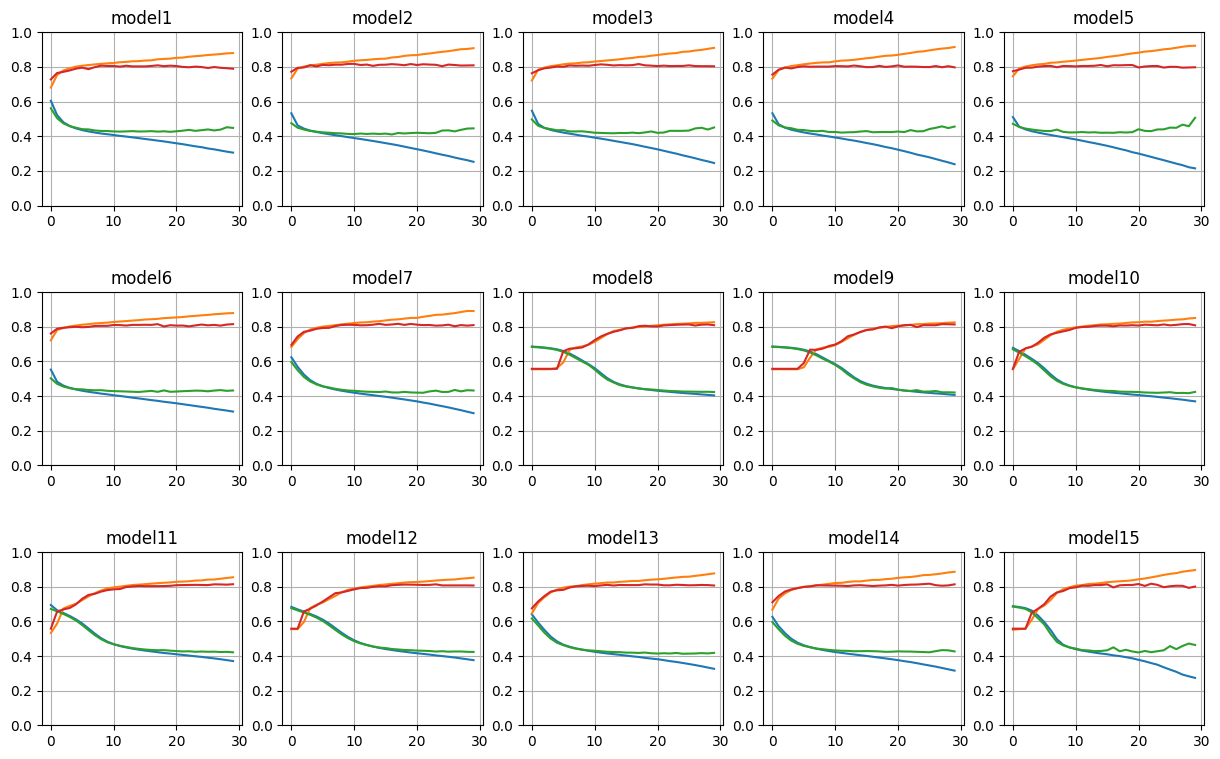

In [37]:
# plot the history of the models
histories = [history1, history2, history3, history4, history5, history6, history7, history8, history9, history10,
            history11, history12, history13, history14, history15]

n_rows = 3
n_cols = 5
plt.figure(figsize=(n_cols * 3, n_rows * 3))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index+1)
        plt.plot(pd.DataFrame(histories[index].history))
        plt.grid(True)
        plt.title(f"model{index+1}", fontsize=12)
        plt.gca().set_ylim(0, 1)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

#### Experiment with epochs

In [38]:
# try longer epochs (with model9)
model16 = keras.models.Sequential([
    keras.layers.Input(shape=X_train_pca.shape[1], name="input"),
    keras.layers.Dense(1000, name="layer1", activation="relu"),
    keras.layers.Dense(700, name="layer2", activation="sigmoid"),
    keras.layers.Dense(400, name="layer3", activation="sigmoid"),
    keras.layers.Dense(260, name="layer4", activation="sigmoid"),
    keras.layers.Dense(30, name="layer5", activation="sigmoid"),
    keras.layers.Dense(1, name="layer6", activation="sigmoid") 
])
# complie
model16.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])
# fit
history16 = model16.fit(X_train_temp, y_train_temp, epochs=50, validation_split=0.1)

# evaluate
description = "Layer1 1000, Layer2 700, Layer3 400, Layer4 260, Layer5 30, Layer6 1, epochs=50"
evaluate_model(model16, description)
architecture_evaluation

Epoch 1/50
457/457 [==============================] - 9s 19ms/step - loss: 0.6879 - accuracy: 0.5550 - val_loss: 0.6859 - val_accuracy: 0.5575
Epoch 2/50
457/457 [==============================] - 9s 19ms/step - loss: 0.6836 - accuracy: 0.5550 - val_loss: 0.6814 - val_accuracy: 0.5575
Epoch 3/50
457/457 [==============================] - 9s 19ms/step - loss: 0.6801 - accuracy: 0.5555 - val_loss: 0.6778 - val_accuracy: 0.5575
Epoch 4/50
457/457 [==============================] - 9s 19ms/step - loss: 0.6759 - accuracy: 0.5551 - val_loss: 0.6730 - val_accuracy: 0.5575
Epoch 5/50
457/457 [==============================] - 9s 21ms/step - loss: 0.6693 - accuracy: 0.5664 - val_loss: 0.6652 - val_accuracy: 0.5575
Epoch 6/50
457/457 [==============================] - 9s 20ms/step - loss: 0.6590 - accuracy: 0.6140 - val_loss: 0.6537 - val_accuracy: 0.6603
Epoch 7/50
457/457 [==============================] - 9s 20ms/step - loss: 0.6442 - accuracy: 0.6670 - val_loss: 0.6369 - val_accuracy: 0.6695

,Accuracy,TP,FP,TN,FN,Sensitivity,Specificity,Precision,Recall,Area Under RoC Curve
"Layer1 100, Layer2 10, Layer3 1",0.807863,578.0,111.0,881.0,236.0,0.710074,0.888105,0.838897,0.710074,0.813808
"Layer1 200, Layer2 20, Layer3 1",0.807309,631.0,165.0,827.0,183.0,0.775184,0.833669,0.792714,0.775184,0.805763
"Layer1 300, Layer2 30, Layer3 1",0.800664,640.0,186.0,806.0,174.0,0.786241,0.812500,0.774818,0.786241,0.798634
"Layer1 400, Layer2 40, Layer3 1",0.801772,635.0,179.0,813.0,179.0,0.780098,0.819556,0.780098,0.780098,0.799827
"Layer1 500, Layer2 50, Layer3 1",0.801772,587.0,131.0,861.0,227.0,0.721130,0.867944,0.817549,0.721130,0.804455
"Layer1 50, Layer2 5, Layer3 1",0.806202,617.0,153.0,839.0,197.0,0.757985,0.845766,0.801299,0.757985,0.805572
"Layer1 400, Layer2 40, Layer3 4, Layer4 1",0.810078,617.0,146.0,846.0,197.0,0.757985,0.852823,0.808650,0.757985,0.809886
"Layer1 879, Layer2 586, Layer3 390, Layer4 260, Layer5 30, Layer6 1",0.808970,633.0,164.0,828.0,181.0,0.777641,0.834677,0.794228,0.777641,0.807421
"Layer1 1000, Layer2 700, Layer3 400, Layer4 260, Layer5 30, Layer6 1",0.808970,627.0,158.0,834.0,187.0,0.770270,0.840726,0.798726,0.770270,0.807786
"Layer1 500, Layer2 180, Layer3 60, Layer4 20, Layer5 1",0.808416,638.0,170.0,822.0,176.0,0.783784,0.828629,0.789604,0.783784,0.806626


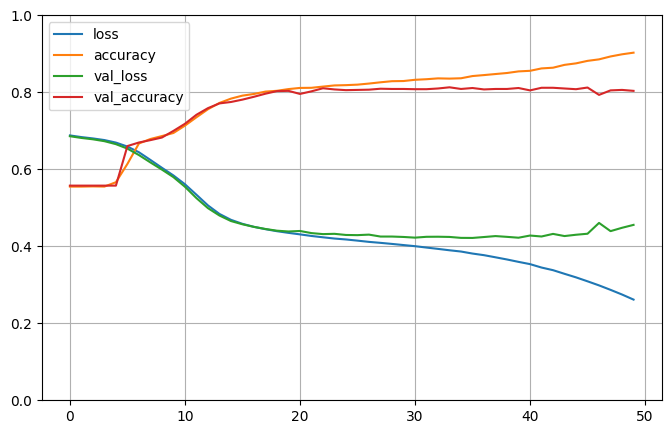

In [39]:
# plot the history
pd.DataFrame(history16.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [42]:
# get number of epochs with highest accuracy on validation set
best = np.argmax(history16.history['val_accuracy']) + 1
best

34

### 3. Experiement with three different train-test set split

1. number of train set - 18051, number of test set -  4513
2. number of train set - 12651, number of test set -  9913
3. number of train set -  7200, number of test set - 15364

#### Classifier 1

In [43]:
# build final_model
model_f1 = keras.models.Sequential([
    keras.layers.Input(shape=X_train_pca.shape[1], name="input"),
    keras.layers.Dense(1000, name="layer1", activation="relu"),
    keras.layers.Dense(700, name="layer2", activation="sigmoid"),
    keras.layers.Dense(400, name="layer3", activation="sigmoid"),
    keras.layers.Dense(260, name="layer4", activation="sigmoid"),
    keras.layers.Dense(30, name="layer5", activation="sigmoid"),
    keras.layers.Dense(1, name="layer6", activation="sigmoid") 
])
# complie
model_f1.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])

# fit (with the epochs=41)
history_f1 = model_f1.fit(X_train_pca, y_train, epochs=best)

Epoch 1/34
565/565 [==============================] - 9s 15ms/step - loss: 0.6863 - accuracy: 0.5547
Epoch 2/34
565/565 [==============================] - 9s 16ms/step - loss: 0.6821 - accuracy: 0.5547
Epoch 3/34
565/565 [==============================] - 11s 19ms/step - loss: 0.6769 - accuracy: 0.5558
Epoch 4/34
565/565 [==============================] - 10s 17ms/step - loss: 0.6683 - accuracy: 0.5740
Epoch 5/34
565/565 [==============================] - 10s 17ms/step - loss: 0.6539 - accuracy: 0.6400
Epoch 6/34
565/565 [==============================] - 10s 17ms/step - loss: 0.6319 - accuracy: 0.6773
Epoch 7/34
565/565 [==============================] - 10s 18ms/step - loss: 0.6056 - accuracy: 0.6867
Epoch 8/34
565/565 [==============================] - 10s 17ms/step - loss: 0.5795 - accuracy: 0.7014
Epoch 9/34
565/565 [==============================] - 10s 18ms/step - loss: 0.5478 - accuracy: 0.7248
Epoch 10/34
565/565 [==============================] - 11s 19ms/step - loss: 0.5121 

#### Classifier 2

In [44]:
# merge into the whole dataset
X_whole = np.concatenate((X_train_pca, X_cv_pca))
y_whole = np.concatenate((y_train, y_cv))

# split for the second spolit
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_whole, y_whole, test_size=9913, random_state=42)
print(X_train_2.shape)
print(X_test_2.shape)

(12651, 1317)
(9913, 1317)


In [45]:
# build final_model
model_f2 = keras.models.Sequential([
    keras.layers.Input(shape=X_train_pca.shape[1], name="input"),
    keras.layers.Dense(1000, name="layer1", activation="relu"),
    keras.layers.Dense(700, name="layer2", activation="sigmoid"),
    keras.layers.Dense(400, name="layer3", activation="sigmoid"),
    keras.layers.Dense(260, name="layer4", activation="sigmoid"),
    keras.layers.Dense(30, name="layer5", activation="sigmoid"),
    keras.layers.Dense(1, name="layer6", activation="sigmoid") 
])
# complie
model_f2.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])

# fit (with the epochs=41)
history_f2 = model_f2.fit(X_train_2, y_train_2, epochs=best)

Epoch 1/34
396/396 [==============================] - 8s 20ms/step - loss: 0.6861 - accuracy: 0.5567
Epoch 2/34
396/396 [==============================] - 8s 19ms/step - loss: 0.6840 - accuracy: 0.5567
Epoch 3/34
396/396 [==============================] - 10s 25ms/step - loss: 0.6818 - accuracy: 0.5567
Epoch 4/34
396/396 [==============================] - 10s 25ms/step - loss: 0.6793 - accuracy: 0.5567
Epoch 5/34
396/396 [==============================] - 8s 21ms/step - loss: 0.6758 - accuracy: 0.5567
Epoch 6/34
396/396 [==============================] - 8s 20ms/step - loss: 0.6711 - accuracy: 0.5581
Epoch 7/34
396/396 [==============================] - 8s 20ms/step - loss: 0.6640 - accuracy: 0.5789
Epoch 8/34
396/396 [==============================] - 8s 19ms/step - loss: 0.6540 - accuracy: 0.6386
Epoch 9/34
396/396 [==============================] - 7s 18ms/step - loss: 0.6406 - accuracy: 0.6758
Epoch 10/34
396/396 [==============================] - 7s 18ms/step - loss: 0.6241 - accu

#### Classifier 3

In [46]:
# split for the third spolit
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_whole, y_whole, test_size=15364, random_state=42)
print(X_train_3.shape)
print(X_test_3.shape)

(7200, 1317)
(15364, 1317)


In [47]:
# build final_model
model_f3 = keras.models.Sequential([
    keras.layers.Input(shape=X_train_pca.shape[1], name="input"),
    keras.layers.Dense(1000, name="layer1", activation="relu"),
    keras.layers.Dense(700, name="layer2", activation="sigmoid"),
    keras.layers.Dense(400, name="layer3", activation="sigmoid"),
    keras.layers.Dense(260, name="layer4", activation="sigmoid"),
    keras.layers.Dense(30, name="layer5", activation="sigmoid"),
    keras.layers.Dense(1, name="layer6", activation="sigmoid") 
])
# complie
model_f3.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])

# fit (with the epochs=41)
history_f3 = model_f3.fit(X_train_3, y_train_3, epochs=best)

Epoch 1/34
225/225 [==============================] - 5s 20ms/step - loss: 0.6851 - accuracy: 0.5621
Epoch 2/34
225/225 [==============================] - 5s 22ms/step - loss: 0.6832 - accuracy: 0.5636
Epoch 3/34
225/225 [==============================] - 5s 22ms/step - loss: 0.6819 - accuracy: 0.5636
Epoch 4/34
225/225 [==============================] - 5s 22ms/step - loss: 0.6805 - accuracy: 0.5636
Epoch 5/34
225/225 [==============================] - 4s 20ms/step - loss: 0.6792 - accuracy: 0.5636
Epoch 6/34
225/225 [==============================] - 4s 19ms/step - loss: 0.6770 - accuracy: 0.5636
Epoch 7/34
225/225 [==============================] - 4s 18ms/step - loss: 0.6752 - accuracy: 0.5636
Epoch 8/34
225/225 [==============================] - 4s 18ms/step - loss: 0.6726 - accuracy: 0.5636
Epoch 9/34
225/225 [==============================] - 4s 17ms/step - loss: 0.6696 - accuracy: 0.5639
Epoch 10/34
225/225 [==============================] - 4s 17ms/step - loss: 0.6656 - accura

In [48]:
e1 = model_f1.evaluate(X_cv_pca, y_cv) 
e2 = model_f2.evaluate(X_test_2, y_test_2) 
e3 = model_f3.evaluate(X_test_3, y_test_3) 

481/481 [==============================] - 5s 10ms/step - loss: 0.4501 - accuracy: 0.8014


#### Evaluate accuracy

In [49]:
print("Classifier1 - Accuracy on train set: ", history_f1.history['accuracy'][-1], ", Accuracy on test set: ", e1[-1])
print("Classifier2 - Accuracy on train set: ", history_f2.history['accuracy'][-1], ", Accuracy on test set: ", e2[-1])
print("Classifier3 - Accuracy on train set: ", history_f3.history['accuracy'][-1], ", Accuracy on test set: ", e3[-1])

Classifier1 - Accuracy on train set:  0.8489280343055725 , Accuracy on test set:  0.8185242414474487
Classifier2 - Accuracy on train set:  0.827760636806488 , Accuracy on test set:  0.8128719925880432
Classifier3 - Accuracy on train set:  0.7968055605888367 , Accuracy on test set:  0.8013538122177124
